In [46]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt 
import numpy as np 
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import helper
import math
import torch.nn.functional as F
from torch import optim
import cv2



In [47]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [48]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/gi4e_database.zip', 'r') as zip:
  A = zip.extractall()


In [49]:

from zipfile import ZipFile
A = ZipFile('/content/drive/MyDrive/gi4e_database.zip')
names = A.namelist()



In [50]:

###Save image to list and grayscale them 

In [51]:
from google.colab.patches import cv2_imshow
images = [] 
ind = 1 
s=''
for i in range(1,len(names)):
  if i ==1237:
    break
  image = cv2.imread(names[i])
  images.append(cv2.cvtColor(image , cv2.COLOR_BGR2GRAY))

In [52]:
all_targ  = names[1237:][-2]

In [53]:
new_im = [im/255 for im in images]


In [54]:

def img_drow(path,num_of_im, num_of_vers):
  """This func just drow image with iris """
  with open(path, 'r') as f : 
    s = list(f)
  s=s[num_of_vers].split('\t')  
  s[-1] = s[-1].strip()
  s=s[1:]

  x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6 = s
  x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6 = float(x1) ,float(y1) , float(x2) ,float(y2) ,float(x3),float(y3) , float(x4),float(y4), float(x5) ,float(y5),float(x6),float(y6)
  pict1  = cv2.rectangle(images[(num_of_im-1)*12 + num_of_vers],(int(x1)-1,int(y1)-1),(int(x3)+1,int(y3)+1),(255,0,0),1)
  cv2_imshow(pict1)
  pict1 = (cv2.rectangle(pict1,(int(x4)-1,int(y4)-1),(int(x6)+1,int(y6)+1),(255,0,0),1))
  cv2_imshow(pict1)
  pict1 = (cv2.circle(pict1,(int(x2),int(y2)),3,(0,0,255),-1))
  cv2_imshow((cv2.circle(pict1,(int(x5),int(y5)),3,(0,255,255),-1)))
    #cv.rectangle(image, )


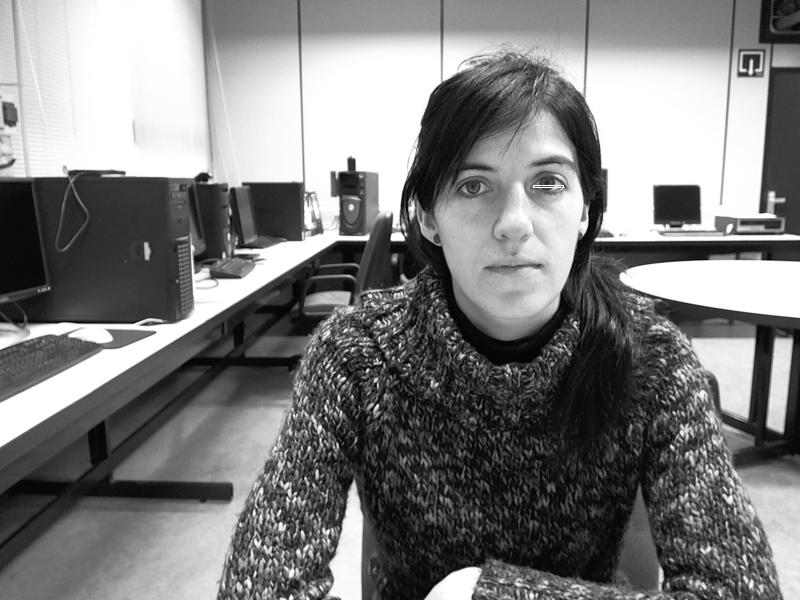

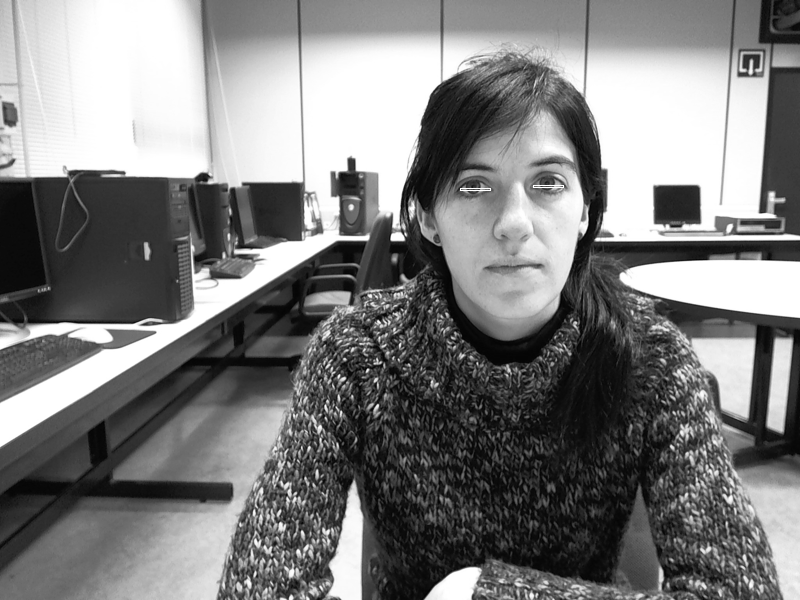

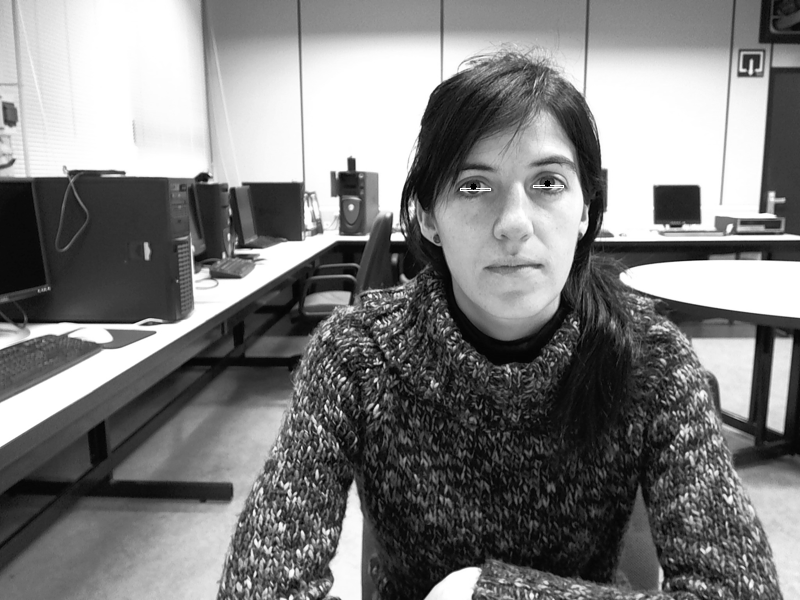

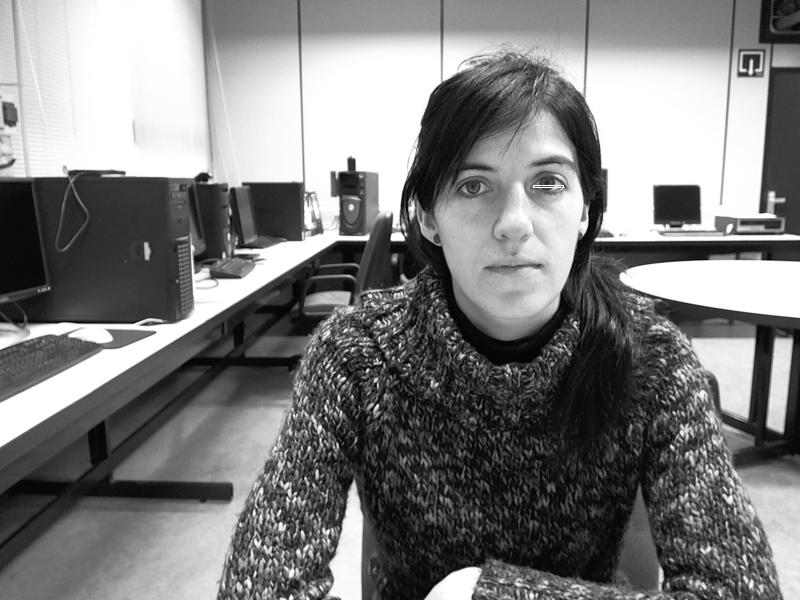

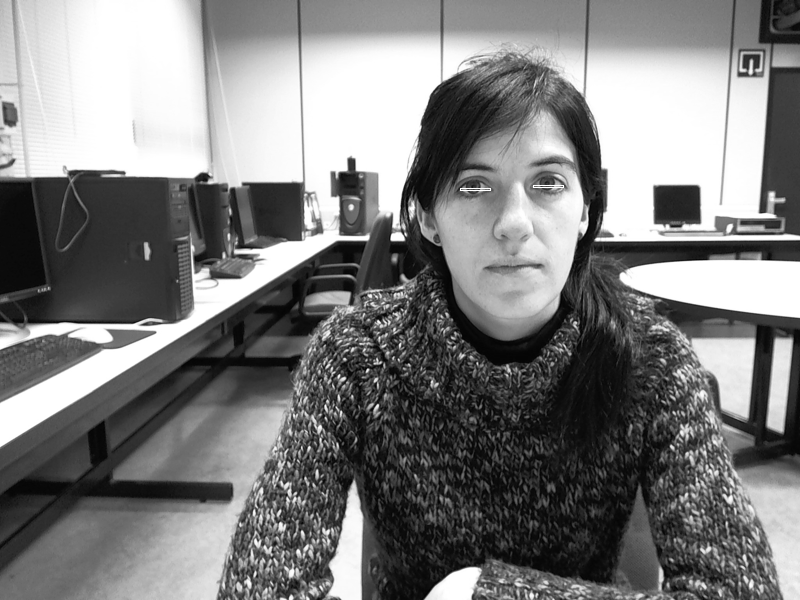

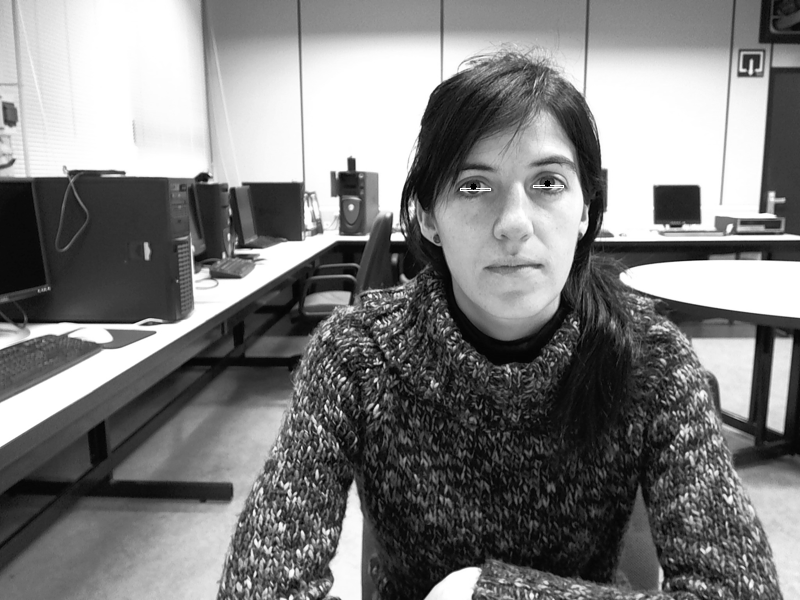

In [55]:
img_drow("/content/labels/004_image_labels.txt", 4,3)

In [56]:
with open("/content/labels/001_image_labels.txt", 'r') as f : 
    s = list(f)
    #cv.rectangle(image, 

In [57]:
text = names[1239:-2]


In [58]:
text[0]

'labels/001_image_labels.txt'

'labels/001_image_labels.txt'

In [59]:
from PIL import Image

NEW_im_l = []
NEW_im_r = []
targ_l = [] 
targ_r = []
def get_im(ind):
  """FUNC CREATE pict with iris and resize all images"""
  with open(text[ind], 'r') as f :
    s = list(f)


    for i in range(12) :      #cv.rectangle(image,
      K = s[i].split()  
      iris_l = np.zeros_like(new_im[0])
      iris_r  = np.zeros_like(new_im[0])
      x1 = K[1]
      y1 = K[2]
      x2 = K[3]
      y2 = K[4] 
      x3 = K[5]
      y3 = K[6]
      x4  = K[7]
      y4 =  K[8]
      x5= K[9]
      y5= K[10]
      x6 = K[11] 
      y6 = K[12]

      iris_l[int(float(y2)) , int(float(x2))] = 1
      iris_r[int(float(y5)), int(float(x5))] = 1 
   

      new_l  = cv2.resize(new_im[ind*12 + i][ int(float(y1))-24 : int(float(y3))+24 , int(float(x3)):int(float(x1))] ,(48,48))
      #new_r = cv2.resize(new_im[ind*12 + i][ int(float(y4))-24 : int(float(y6))+24 , int(float(x6)):int(float(x4))] ,(48,48))

      iris_l =  cv2.resize(iris_l[ int(float(y1))-24 : int(float(y3))+24 , int(float(x3)):int(float(x1))],(48,48))
     # iris_r =  iris_r[ int(float(y4))-24 : int(float(y6))+24 , int(float(x6)):int(float(x4))]
      NEW_im_l.append(new_l)
     # NEW_im_r.append(new_r)
      targ_l.append(iris_l)
    #  targ_r.append(iris_r)
         
        #cv.rectangle(image, 
    


In [60]:
for beg in range(len(text)):
  get_im(beg)

In [61]:
new_targ = []
for im in range(len(targ_l)):
  new_im=np.zeros_like(targ_l[0])
  for i in range (48):
    for j in range(48):
      if targ_l[im][i][j]==targ_l[im].max():
        new_im[i][j] = 1
  new_targ.append(new_im)      



In [62]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(np.array(NEW_im_l)  , np.array(targ_l) , test_size = 0.1, random_state=42)


In [63]:
batch_size = 1
test_batch_size = 1

class MyDataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.Tensor(data)
        self.data = self.data[:,None,:]
        print(self.data.shape)
        self.targets = torch.Tensor(targets)
        self.targets = self.targets[:,None, :]

        print(self.data.shape)
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        return x, y
    
    def __len__(self):
        return len(self.data)


train = MyDataset(X_train, y_train)
train_loader = DataLoader(train, batch_size=batch_size)
test = MyDataset(X_test, y_test)
test_loader = DataLoader(test, batch_size=batch_size)

torch.Size([1112, 1, 48, 48])
torch.Size([1112, 1, 48, 48])
torch.Size([124, 1, 48, 48])
torch.Size([124, 1, 48, 48])
torch.Size([1112, 1, 48, 48])
torch.Size([1112, 1, 48, 48])
torch.Size([124, 1, 48, 48])
torch.Size([124, 1, 48, 48])


In [64]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder_1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1) ,
            nn.Sigmoid()
            )
        self.encoder_2=  nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, padding=2, stride=1),
            nn.Dropout2d(0.2),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=5, padding=2, stride=1),
            nn.Dropout2d(0.2),
            nn.MaxPool2d(2),
            nn.Sigmoid()
            )

        self.decoder_1 = nn.Sequential(
           nn.ConvTranspose2d(256, 64, kernel_size=4, padding=0, stride=4),
           nn.Dropout2d(0.2)
        )
        self.decoder_2 = nn.Sequential(
          nn.ReLU(),
          nn.ConvTranspose2d(128, 64, kernel_size=3, padding=1, stride=1),
          nn.Dropout2d(0.2),
          nn.ReLU(),
          nn.ConvTranspose2d(64, 1, kernel_size=3, padding=1, stride=1),
          nn.Sigmoid()
        )
        self.decoder_aux = nn.Sequential(
           nn.ConvTranspose2d(256, 128, kernel_size=2, padding=0, stride=2),
           nn.Dropout2d(0.2),
           nn.ReLU(),
           nn.ConvTranspose2d(128, 64, kernel_size=2, padding=0, stride=2),
           nn.Dropout2d(0.2),
           nn.ReLU(),
           nn.ConvTranspose2d(64, 1, kernel_size=3, padding=1, stride=1),
           nn.Dropout2d(0.2),
           nn.Sigmoid()
        )
        

    def forward(self,x):
        x  = self.encoder_1(x)
        x1 = x
        x = self.encoder_2(x)
        y = x
        x = self.decoder_1(x)
        x = torch.cat([x, x1], axis=1) #128x48x48
        x = (self.decoder_2(x))
        y = (self.decoder_aux(y))
        return x , y


#Instantiate the model
model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (encoder_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Sigmoid()
  )
  (encoder_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Dropout2d(p=0.2, inplace=False)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
    (4): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): Dropout2d(p=0.2, inplace=False)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Sigmoid()
  )
  (decoder_1): Sequential(
    (0): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(4, 4))
    (1): Dropout2d(p=0.2, inplace=False)
  )
  (decoder_2): Sequential(
    (0): ReLU()
    (1): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): Dropout2d(p=0.2, inplace=False)
    (3): ReLU()
    (4): ConvTranspose2d(64, 1, kernel_size=(3, 3), stride=(1, 1

In [65]:
num_epochs = 5
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
outputs = []
criterions  =[nn.MSELoss(),nn.L1Loss()]
optimizers = [torch.optim.SGD, torch.optim.Adamax, torch.optim.Adam, torch.optim.RMSprop]
for optimizer in optimizers:
  optimizer = optimizer(model.parameters(),lr= 0.00005, weight_decay = 1e-6)
  for epoch in range(num_epochs):
    for img, label in train_loader:
      img, label = img.to(device), label.to(device)
      #print(img.shape)
      i= torch.argmax(label).item()//48 
      j= torch.argmax(label).item() % 48 
      iris , pict = model(img)
      #loss = criterion(recon[:,1:2,],img)
      loss = criterions[0]( pict[:,:,i-10:i+10,j-10:j+10], img[:,:,i-10:i+10,j-10:j+10]) 
      loss2 = criterions[0](iris[:,:,i-10:i+10,j-10:j+10],label[:,:,i-10:i+10,j-10:j+10])
      loss += loss2
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    print(f"Epoch :{epoch+1}, Loss : {loss.item():.4f}", type(optimizer) )
    outputs.append((img,pict,iris, label))  

Epoch :1, Loss : 0.0703 <class 'torch.optim.sgd.SGD'>
Epoch :2, Loss : 0.0173 <class 'torch.optim.sgd.SGD'>
Epoch :3, Loss : 0.0186 <class 'torch.optim.sgd.SGD'>
Epoch :4, Loss : 0.0393 <class 'torch.optim.sgd.SGD'>
Epoch :5, Loss : 0.0185 <class 'torch.optim.sgd.SGD'>
Epoch :1, Loss : 0.0252 <class 'torch.optim.adamax.Adamax'>
Epoch :2, Loss : 0.0306 <class 'torch.optim.adamax.Adamax'>
Epoch :3, Loss : 0.0139 <class 'torch.optim.adamax.Adamax'>
Epoch :4, Loss : 0.0096 <class 'torch.optim.adamax.Adamax'>
Epoch :5, Loss : 0.0089 <class 'torch.optim.adamax.Adamax'>
Epoch :1, Loss : 0.0089 <class 'torch.optim.adam.Adam'>
Epoch :2, Loss : 0.0064 <class 'torch.optim.adam.Adam'>
Epoch :3, Loss : 0.0392 <class 'torch.optim.adam.Adam'>
Epoch :4, Loss : 0.0109 <class 'torch.optim.adam.Adam'>
Epoch :5, Loss : 0.0055 <class 'torch.optim.adam.Adam'>
Epoch :1, Loss : 0.0048 <class 'torch.optim.rmsprop.RMSprop'>
Epoch :2, Loss : 0.0090 <class 'torch.optim.rmsprop.RMSprop'>
Epoch :3, Loss : 0.0392 <c

just choose best optim. RMSprop show best loss
Now just create test loop 
(its look train but without opt e.t.c)

In [66]:
img_test=[]
for epoch in range(1):
  for img, label in test_loader:
    img, label = img.to(device), label.to(device)
    iris, pict  = model(img)
    #loss = criterion(recon[:,1:2,],img)
    i , j = torch.argmax(label).item()//48 , torch.argmax(label).item() % 48 
    loss = criterions[0](pict, img) 
    loss2 = criterions[0](label[:,:,i-10:i+10,j-10:j+10], iris[:,:,i-10:i+10,j-10:j+10])
    loss+=loss2
    #loss += loss2
    #optimizer.zero_grad()
    #loss.backward()
    #optimizer.step()
    print(f"Epoch :{epoch+1}, Loss : {loss.item():.5f}")
    loss = 0
    img_test.append((img,pict,iris, label))

Epoch :1, Loss : 0.02120
Epoch :1, Loss : 0.00327
Epoch :1, Loss : 0.00493
Epoch :1, Loss : 0.00858
Epoch :1, Loss : 0.00681
Epoch :1, Loss : 0.01545
Epoch :1, Loss : 0.00407
Epoch :1, Loss : 0.00857
Epoch :1, Loss : 0.00396
Epoch :1, Loss : 0.00723
Epoch :1, Loss : 0.00209
Epoch :1, Loss : 0.00676
Epoch :1, Loss : 0.00433
Epoch :1, Loss : 0.00562
Epoch :1, Loss : 0.00380
Epoch :1, Loss : 0.07131
Epoch :1, Loss : 0.00571
Epoch :1, Loss : 0.04411
Epoch :1, Loss : 0.01360
Epoch :1, Loss : 0.00674
Epoch :1, Loss : 0.01340
Epoch :1, Loss : 0.00523
Epoch :1, Loss : 0.00586
Epoch :1, Loss : 0.00234
Epoch :1, Loss : 0.01354
Epoch :1, Loss : 0.01666
Epoch :1, Loss : 0.01655
Epoch :1, Loss : 0.00217
Epoch :1, Loss : 0.00315
Epoch :1, Loss : 0.00985
Epoch :1, Loss : 0.00590
Epoch :1, Loss : 0.00543
Epoch :1, Loss : 0.00745
Epoch :1, Loss : 0.00497
Epoch :1, Loss : 0.01461
Epoch :1, Loss : 0.00627
Epoch :1, Loss : 0.00668
Epoch :1, Loss : 0.00906
Epoch :1, Loss : 0.00441
Epoch :1, Loss : 0.01540


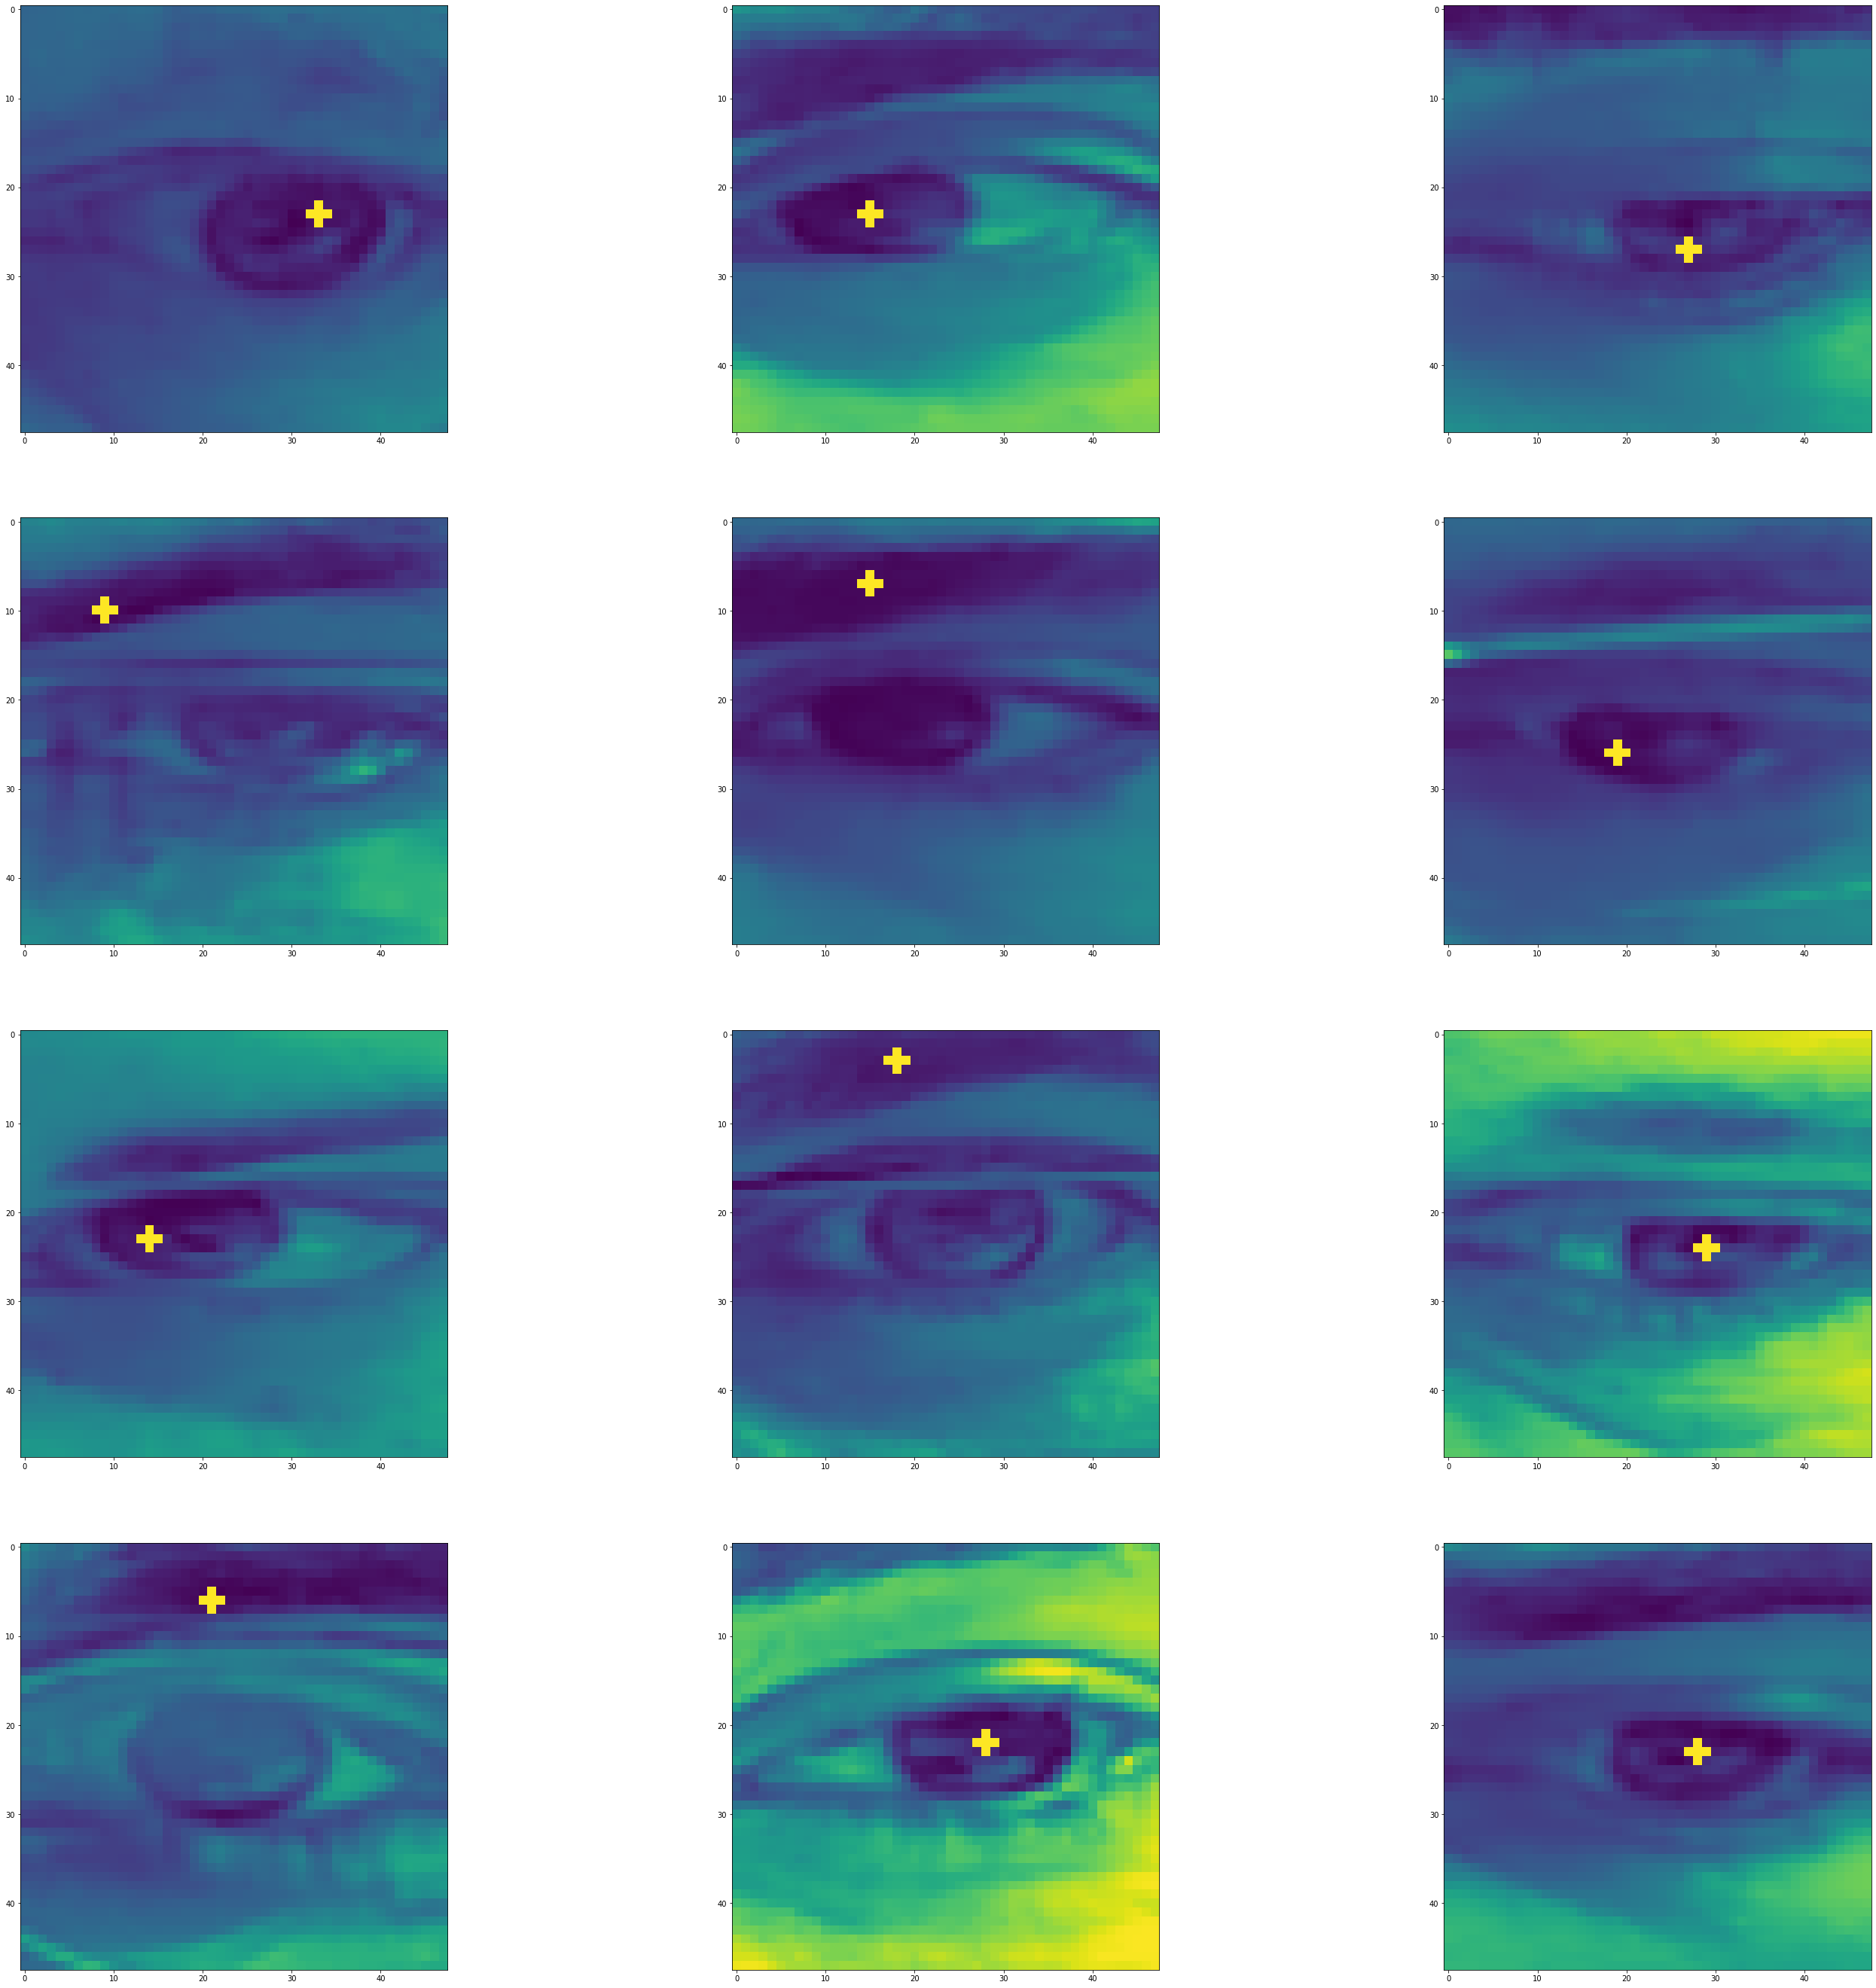

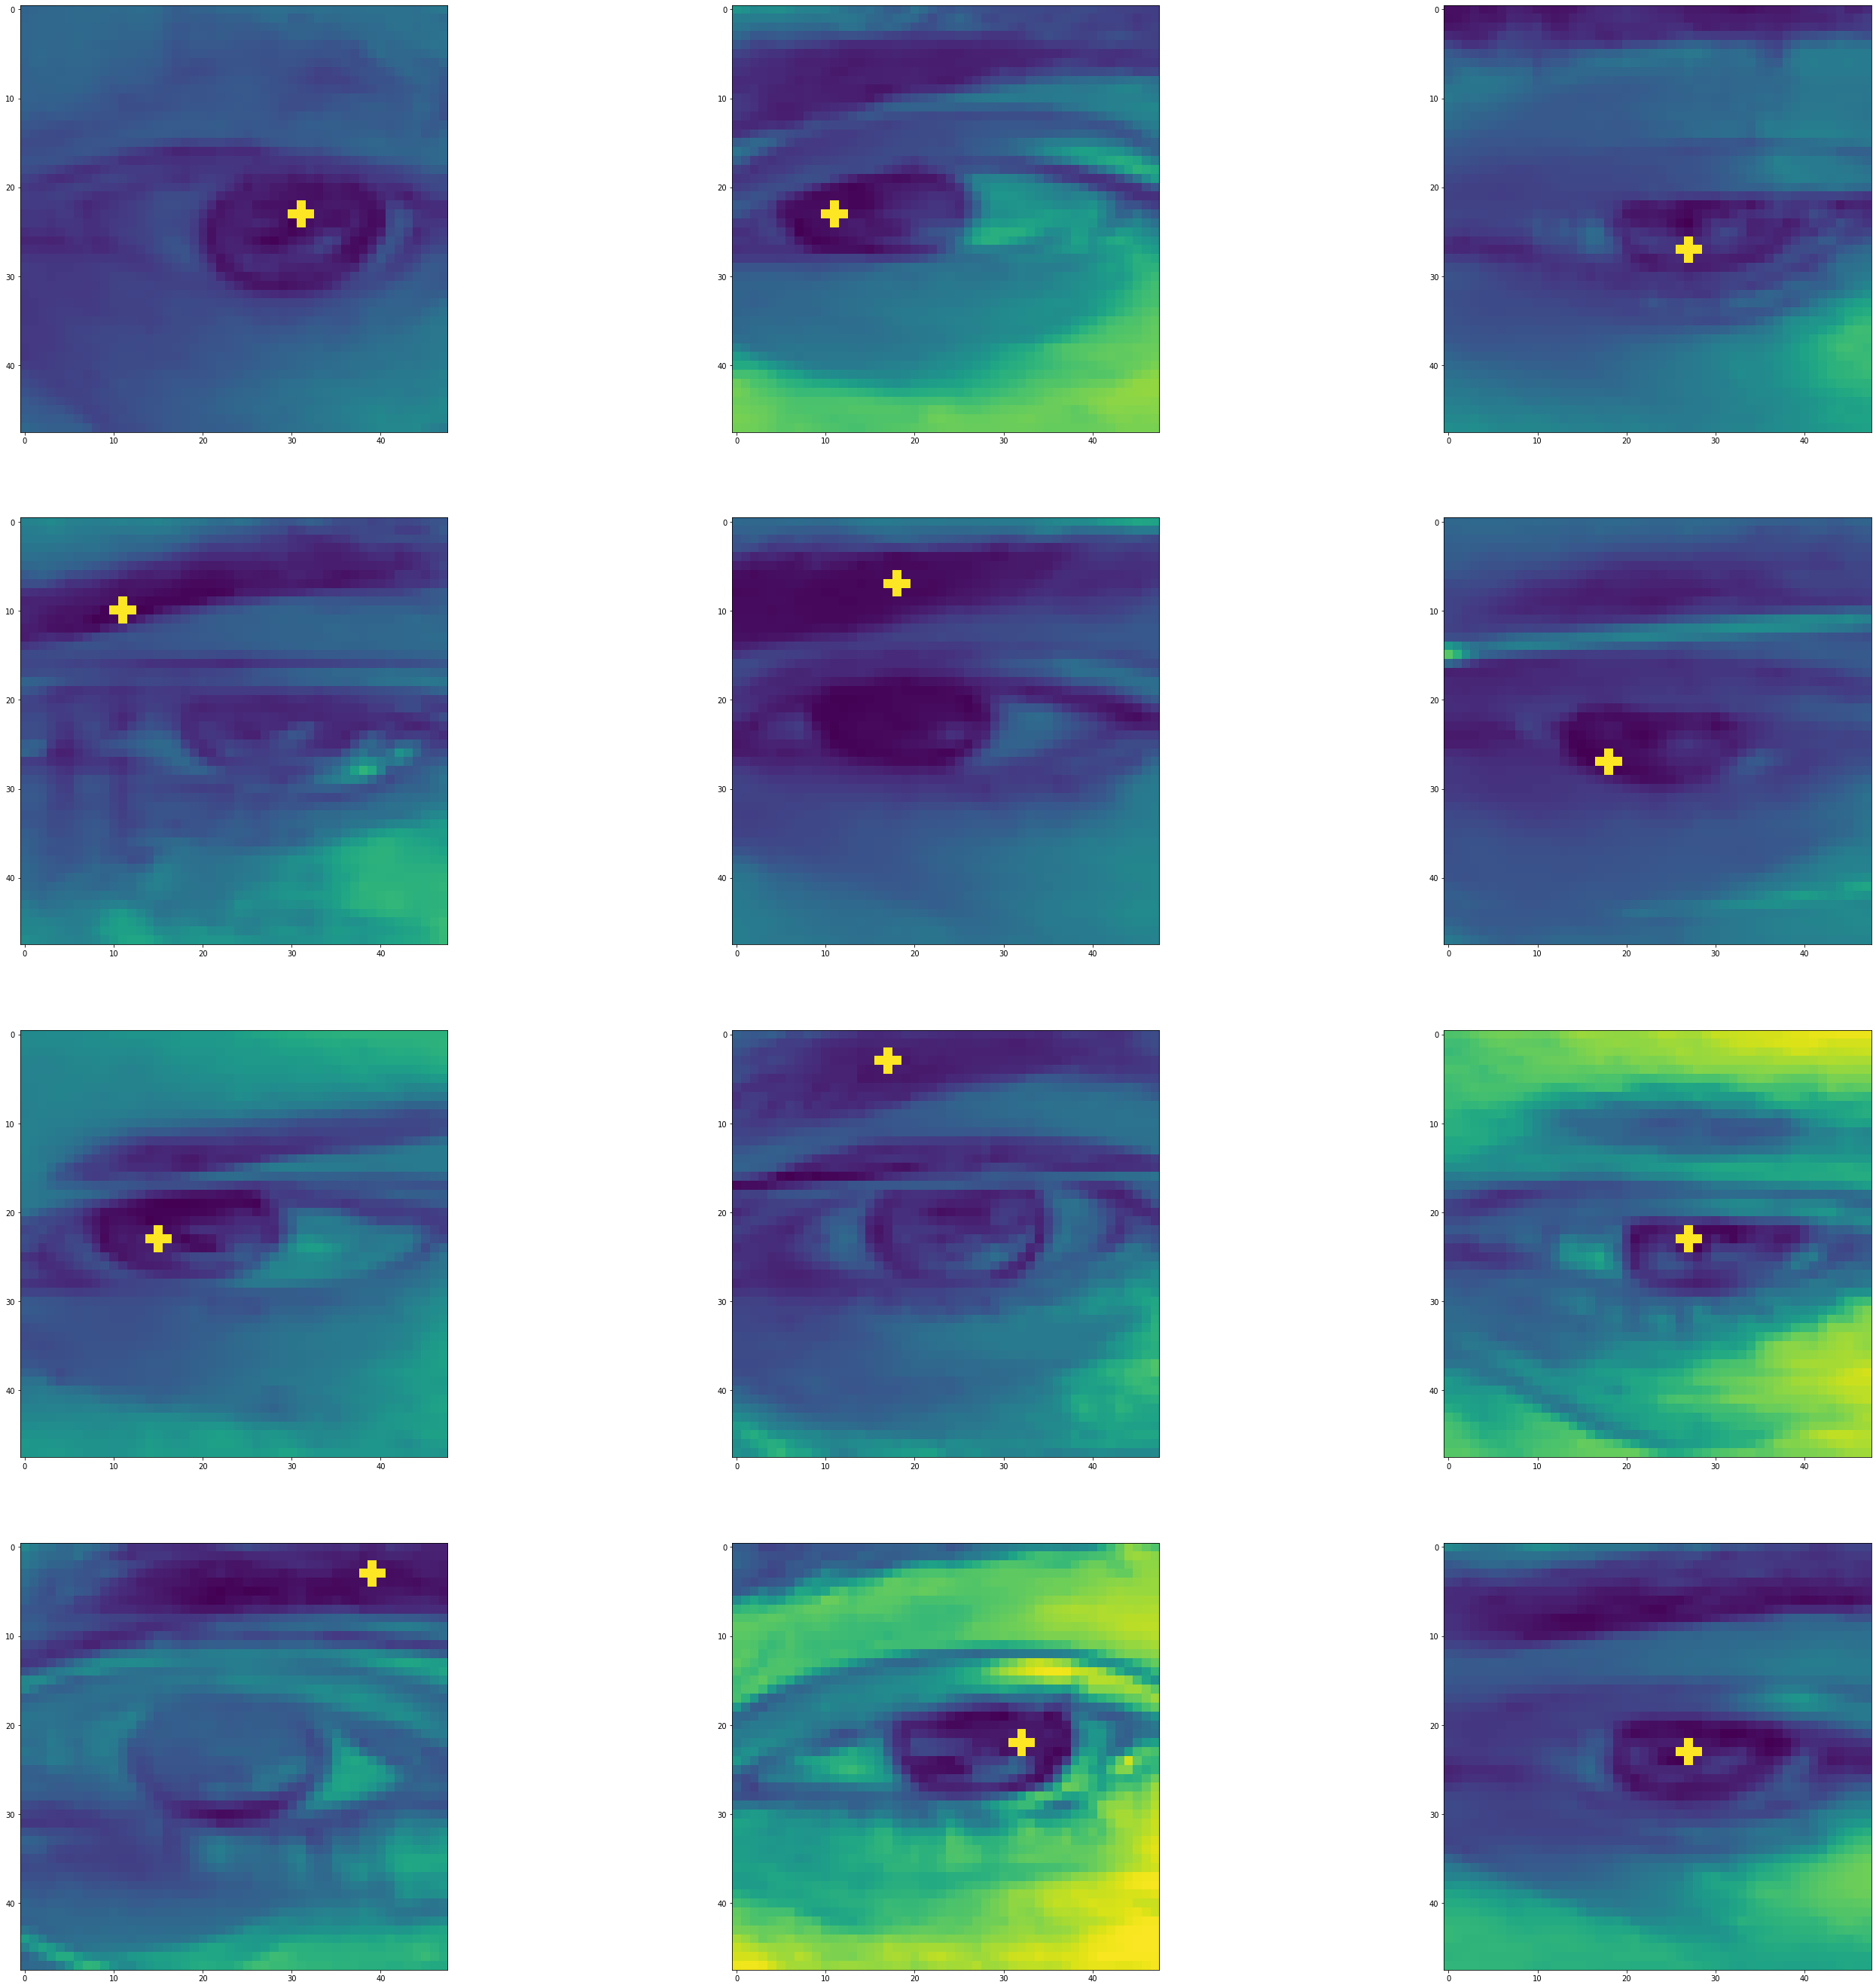

In [67]:
images = []
iris = []
RESULT = []
for output in img_test:
  images.append(output[0][0][0].cpu().detach().numpy())
  im = output[0][0][0].cpu().detach().numpy()
  iris.append(output[2][0][0].cpu().detach().numpy())
  ir = output[2][0][0].cpu().detach().numpy()
  for j in range(2, 46):
    for k in range(2, 46):
      if ir[j][k]==np.max(ir[2:46,2:46]):
        im[j][k]=1
        im[j][k-1]=1
        im[j][k+1]=1
        im[j-1][k]=1
        im[j+1][k]=1
        RESULT.append(im)

fig=plt.figure(figsize=(48, 48))
for i in range(10,22):
  fig.add_subplot(4,3,i-10+1)
  plt.imshow((RESULT[i]))
plt.show()



RESULTS : So the model predicts well the location of iris, cases when the eye is clearly visible - but if part of the hairstyle or eyebrow is caught, then errors are possible (ideally a pre-GAN can be used to avoid comparison with other dark areas). RMSprop show best performance 

TASK 5

In [68]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [69]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/Dp_data_modified.zip', 'r') as zip:
  A = zip.extractall()

A = ZipFile('/content/drive/MyDrive/Dp_data_modified.zip')
names = A.namelist()

In [70]:
names[5].split('/')

['Dp_testset', 'Decorator', 'SearchEngine-master', '.idea', 'encodings.xml']

['Dp_testset', 'Decorator', 'SearchEngine-master', '.idea', 'encodings.xml']

In [71]:
all_paths = [name.split("/") for name in names]

In [72]:
train = []
test = []
l = []
for  i in all_paths : 
  if i[0] == "Dp_testset" and i[-1]=='class.csv':
    test.append(i)
  if i[0]=="Dp_trainset" and i[-1]=='class.csv':
    train.append(i)
  l.append(i[1])  
  

CREATE SPEC. DICTIONARY FOR PATTERNs

In [73]:
patterns = {'Abstract_factory':'Creational',
            'Builder':'Creational',
            'Factory':'Creational',
            'Prototype':'Creational',
            'Singleton':'Creational',
            'Adapter':'Structural',
            'Bridge':'Structural',
            'Composite':'Structural',
            'Decorator':'Structural',
            'Facade':'Structural',
            'Flyweight':'Structural',
            'Proxy':'Structural',           
            'Chain_of_responsibility':'Behavioral',
            'Command':'Behavioral',
            'Interpreter':'Behavioral',
            'Iterator':'Behavioral',
            'Mediator':'Behavioral',
            'Memento':'Behavioral',
            'Observer':'Behavioral',
            'State':'Behavioral',
            'Strategy':'Behavioral',
            'Template':'Behavioral',
            'Visitor':'Behavioral'}

In [74]:
train = []
test = []
l = []
for f in A.namelist(): 
  i = f.split('/')
  if i[-1] == 'class.csv':
    if i[0] == "Dp_testset":
      test.append(f)
    if i[0]=="Dp_trainset":
      train.append(f)
    #l.append(i[1])

In [75]:
from sklearn import preprocessing
import pandas as pd 
le = preprocessing.LabelEncoder()
train_df=pd.DataFrame()

for pa in train:
  tmp = pd.read_csv(pa)
  if tmp.shape[0]!=0 and tmp.shape[1]!=0:
    

    #Delete columns 'class','file'
    tmp=tmp.drop('file',axis=1)
    tmp=tmp.drop('type',axis=1)
    tmp=tmp.drop('class',axis=1)
    
    tmp = tmp.fillna(0)


    tmp = pd.DataFrame(tmp.sum()).T

    tmp['target']=np.full(1, patterns[pa.split('/')[1]])
    
    train_df = pd.concat([train_df, tmp],ignore_index=True)

In [76]:
test_df=pd.DataFrame()

for pa in test:
  tmp = pd.read_csv(pa)
  if tmp.shape[0]!=0 and tmp.shape[1]!=0:
    

    #Delete columns 'class','file'
    tmp=tmp.drop('file',axis=1)
    tmp=tmp.drop('type',axis=1)
    tmp=tmp.drop('class',axis=1)
    
    tmp = tmp.fillna(0)


    tmp = pd.DataFrame(tmp.sum()).T

    tmp['target']=np.full(1, patterns[pa.split('/')[1]])
    
    test_df = pd.concat([test_df, tmp],ignore_index=True)

In [77]:
len(train_df)

369

369

In [78]:
y_train=train_df['target']
X_train = train_df.drop('target',axis=1)

y_test=test_df['target']
X_test = test_df.drop('target',axis=1)

In [79]:
X_train.head(5)

,cbo,wmc,dit,rfc,lcom,tcc,lcc,totalMethodsQty,staticMethodsQty,publicMethodsQty,privateMethodsQty,protectedMethodsQty,defaultMethodsQty,abstractMethodsQty,finalMethodsQty,synchronizedMethodsQty,totalFieldsQty,staticFieldsQty,publicFieldsQty,privateFieldsQty,protectedFieldsQty,defaultFieldsQty,visibleFieldsQty,finalFieldsQty,synchronizedFieldsQty,nosi,loc,returnQty,loopQty,comparisonsQty,tryCatchQty,parenthesizedExpsQty,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocksQty,anonymousClassesQty,innerClassesQty,lambdasQty,uniqueWordsQty,modifiers,logStatementsQty
0,26.0,34.0,15.0,39.0,21.0,2.066667,3.100000,28.0,2.0,15.0,4.0,5.0,4.0,24.0,0.0,0.0,0.0,13.0,2.0,0.0,13.0,0.0,0.0,0.0,0.0,4.0,160.0,4.0,1.0,2.0,0.0,0.0,3.0,7.0,19.0,1.0,17.0,3.0,2.0,0.0,0.0,235.0,7.0,0.0
1,12.0,13.0,9.0,17.0,5.0,0.333333,0.333333,12.0,1.0,12.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3.0,61.0,1.0,1.0,0.0,0.0,0.0,5.0,2.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,40.0,1030.0,0.0
2,18.0,22.0,12.0,19.0,7.0,0.285714,0.285714,18.0,1.0,18.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,91.0,2.0,2.0,2.0,0.0,3.0,7.0,8.0,11.0,8.0,11.0,2.0,0.0,0.0,0.0,107.0,1033.0,0.0
3,30.0,50.0,22.0,85.0,14.0,1.500000,2.714286,37.0,6.0,36.0,1.0,0.0,0.0,36.0,0.0,0.0,0.0,12.0,0.0,0.0,8.0,4.0,0.0,1.0,0.0,19.0,278.0,6.0,2.0,0.0,1.0,0.0,40.0,18.0,43.0,6.0,42.0,10.0,0.0,0.0,8.0,240.0,2066.0,0.0
4,7.0,10.0,5.0,6.0,3.0,1.000000,1.000000,9.0,1.0,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,31.0,5.0,0.0


,cbo,wmc,dit,rfc,lcom,tcc,lcc,totalMethodsQty,staticMethodsQty,publicMethodsQty,privateMethodsQty,protectedMethodsQty,defaultMethodsQty,abstractMethodsQty,finalMethodsQty,synchronizedMethodsQty,totalFieldsQty,staticFieldsQty,publicFieldsQty,privateFieldsQty,protectedFieldsQty,defaultFieldsQty,visibleFieldsQty,finalFieldsQty,synchronizedFieldsQty,nosi,loc,returnQty,loopQty,comparisonsQty,tryCatchQty,parenthesizedExpsQty,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocksQty,anonymousClassesQty,innerClassesQty,lambdasQty,uniqueWordsQty,modifiers,logStatementsQty
0,26.0,34.0,15.0,39.0,21.0,2.066667,3.100000,28.0,2.0,15.0,4.0,5.0,4.0,24.0,0.0,0.0,0.0,13.0,2.0,0.0,13.0,0.0,0.0,0.0,0.0,4.0,160.0,4.0,1.0,2.0,0.0,0.0,3.0,7.0,19.0,1.0,17.0,3.0,2.0,0.0,0.0,235.0,7.0,0.0
1,12.0,13.0,9.0,17.0,5.0,0.333333,0.333333,12.0,1.0,12.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3.0,61.0,1.0,1.0,0.0,0.0,0.0,5.0,2.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,40.0,1030.0,0.0
2,18.0,22.0,12.0,19.0,7.0,0.285714,0.285714,18.0,1.0,18.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,91.0,2.0,2.0,2.0,0.0,3.0,7.0,8.0,11.0,8.0,11.0,2.0,0.0,0.0,0.0,107.0,1033.0,0.0
3,30.0,50.0,22.0,85.0,14.0,1.500000,2.714286,37.0,6.0,36.0,1.0,0.0,0.0,36.0,0.0,0.0,0.0,12.0,0.0,0.0,8.0,4.0,0.0,1.0,0.0,19.0,278.0,6.0,2.0,0.0,1.0,0.0,40.0,18.0,43.0,6.0,42.0,10.0,0.0,0.0,8.0,240.0,2066.0,0.0
4,7.0,10.0,5.0,6.0,3.0,1.000000,1.000000,9.0,1.0,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,31.0,5.0,0.0


Using just simple scale from Task 4

> Indented block



In [80]:
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(X_train)

X_train = pd.DataFrame(transformer.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(transformer.transform(X_test),columns = X_test.columns)


In [81]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.transform(y_test)

RANDOM FOREST

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
for  depth in range (2,9):
  clf = RandomForestClassifier(max_depth=depth, random_state=0)
  clf.fit(X_train, y_train)
  y_test_pred=clf.predict(X_test)
  print('accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred),"with depth {}".format(depth)))



accuracy = 0.336283185840708
accuracy = 0.35398230088495575
accuracy = 0.3805309734513274
accuracy = 0.39823008849557523
accuracy = 0.40707964601769914
accuracy = 0.4247787610619469
accuracy = 0.4424778761061947
accuracy = 0.336283185840708
accuracy = 0.35398230088495575
accuracy = 0.3805309734513274
accuracy = 0.39823008849557523
accuracy = 0.40707964601769914
accuracy = 0.4247787610619469
accuracy = 0.4424778761061947


Lets use grid search to check and update all possible params

In [83]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[5,10,25,50,75],'max_features':[4,7,10,15,20,30,40],'min_impurity_decrease':[0.01,0.05,0.001,0.08,0.15,0.2],}
clf = RandomForestClassifier(random_state=1)
crv = GridSearchCV(clf,params,scoring = ('accuracy'),refit=True).fit(X_train,y_train)

In [84]:
result = crv.best_estimator_
y_test_pred=result.predict(X_train)
print('Training accuracy = {}'.format(metrics.accuracy_score(y_train, y_test_pred)))

Training accuracy = 0.989159891598916
Training accuracy = 0.989159891598916


In [85]:
y_test_pred=result.predict(X_test)
print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Testing accuracy = 0.4778761061946903
Testing accuracy = 0.4778761061946903


CATBOOST

In [41]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
CBC = CatBoostClassifier()

parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)                 

0:	learn: 1.0818890	total: 69ms	remaining: 6.14s
1:	learn: 1.0567214	total: 87.1ms	remaining: 3.83s
2:	learn: 1.0373037	total: 104ms	remaining: 3.03s
3:	learn: 1.0216472	total: 121ms	remaining: 2.61s
4:	learn: 1.0090319	total: 138ms	remaining: 2.35s
5:	learn: 0.9972819	total: 155ms	remaining: 2.17s
6:	learn: 0.9843359	total: 171ms	remaining: 2.03s
7:	learn: 0.9711586	total: 187ms	remaining: 1.91s
8:	learn: 0.9571457	total: 203ms	remaining: 1.82s
9:	learn: 0.9469711	total: 206ms	remaining: 1.65s
10:	learn: 0.9322436	total: 222ms	remaining: 1.59s
11:	learn: 0.9218515	total: 238ms	remaining: 1.54s
12:	learn: 0.9119501	total: 243ms	remaining: 1.44s
13:	learn: 0.9034790	total: 259ms	remaining: 1.41s
14:	learn: 0.8920116	total: 279ms	remaining: 1.39s
15:	learn: 0.8830935	total: 295ms	remaining: 1.36s
16:	learn: 0.8716642	total: 310ms	remaining: 1.33s
17:	learn: 0.8651106	total: 326ms	remaining: 1.3s
18:	learn: 0.8565208	total: 342ms	remaining: 1.28s
19:	learn: 0.8493484	total: 359ms	remainin

In [42]:
result = crv.best_estimator_
y_test_pred=result.predict(X_train)
print('Training accuracy = {}'.format(metrics.accuracy_score(y_train, y_test_pred)))
y_test_pred=result.predict(X_test)
print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Training accuracy = 0.989159891598916
Testing accuracy = 0.4778761061946903


XGBOOST

In [43]:
import xgboost as xgb

clf = xgb.XGBClassifier()
params = {'n_estimators':[5,10,25,50,75],'min_impurity_decrease':[0,0.05,0.1],'max_features':[4,7,10,15,20,30,40]}
crv = GridSearchCV(clf,params,scoring = ('accuracy'),refit=True).fit(X_train,y_train)

In [44]:
result = crv.best_estimator_
y_test_pred=result.predict(X_train)
print('Training accuracy = {}'.format(metrics.accuracy_score(y_train, y_test_pred)))

Training accuracy = 0.8455284552845529


In [45]:
y_test_pred=result.predict(X_test)
print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Testing accuracy = 0.4778761061946903


We used random forest xgboost catboost in this work - however, all models have approximately equal results, both on the train and on the test -
low accuracy on the test and high on train can be explained by overfitting - when, for example, too large a tree depth was set - or by the fact that the test data is fundamentally different from the train